In [50]:
# dataframe name is 'df'.
# load the data
# character encoding is  encoding='latin-1'
import pandas as pd

try:
    df = pd.read_csv('Mobiles_Dataset_2025.csv', encoding='latin-1')
    print("Successfully loaded the dataset!")
except FileNotFoundError:
    print("Error: The file 'Mobiles_Dataset_2025.csv' was not found. Please make sure the file is in the correct directory or its named correctly.")
    # stop if the file isn't found
    exit()
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")
    exit()

Successfully loaded the dataset!


In [12]:
# now that the file is found we continue
# let's see how the data looks like. use the 1st 5 rows by use of .head() method

print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
  Company Name            Model Name Mobile Weight  RAM Front Camera  \
0        Apple       iPhone 16 128GB          174g  6GB         12MP   
1        Apple       iPhone 16 256GB          174g  6GB         12MP   
2        Apple       iPhone 16 512GB          174g  6GB         12MP   
3        Apple  iPhone 16 Plus 128GB          203g  6GB         12MP   
4        Apple  iPhone 16 Plus 256GB          203g  6GB         12MP   

  Back Camera   Processor Battery Capacity Screen Size  \
0        48MP  A17 Bionic         3,600mAh  6.1 inches   
1        48MP  A17 Bionic         3,600mAh  6.1 inches   
2        48MP  A17 Bionic         3,600mAh  6.1 inches   
3        48MP  A17 Bionic         4,200mAh  6.7 inches   
4        48MP  A17 Bionic         4,200mAh  6.7 inches   

  Launched Price (Pakistan) Launched Price (India) Launched Price (China)  \
0               PKR 224,999             INR 79,999              CNY 5,799   
1               PKR 234,999       

In [19]:
# the loaded data needs some cleaning. some numeric data but has string data. convert then for easy analysis
#need to check missing value too
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               930 non-null    object 
 1   Model Name                 930 non-null    object 
 2   Mobile Weight              930 non-null    float64
 3   RAM                        928 non-null    float64
 4   Front Camera               880 non-null    float64
 5   Back Camera                930 non-null    object 
 6   Processor                  930 non-null    object 
 7   Battery Capacity           315 non-null    float64
 8   Screen Size                930 non-null    float64
 9   Launched Price (Pakistan)  929 non-null    float64
 10  Launched Price (India)     930 non-null    int64  
 11  Launched Price (China)     930 non-null    int64  
 12  Launched Price (USA)       930 non-null    float64
 13  Launched Price (Dubai)     9

In [18]:
# 930 total entries , 15 rows; 1 with int data type and rest string, no null values, missing values n in battery capacity, front cmera,RAM, and launch price (Pakistan) columns
#Action needed: cleaning and type conversion to numeric for data that needs to be.
import pandas as pd
import re

df = pd.read_csv('Mobiles_Dataset_2025.csv', encoding='latin-1')
print("Successfully loaded the dataset!")

def extract_number(text):
    match = re.search(r'\d+\.?\d*', str(text))
    if match:
        return float(match.group())
    else:
        return None

def sum_megapixels(camera_text):
    numbers = re.findall(r'\d+\.?\d*', str(camera_text))
    total = 0
    for num in numbers:
        total += float(num)
    return total if numbers else None

df['Mobile Weight'] = df['Mobile Weight'].apply(extract_number)
df['RAM'] = df['RAM'].str.replace('GB', '', regex=False)
df['RAM'] = pd.to_numeric(df['RAM'], errors='coerce')
df['Front Camera'] = df['Front Camera'].str.replace('MP', '', regex=False)
df['Front Camera'] = pd.to_numeric(df['Front Camera'], errors='coerce')
df['Battery Capacity'] = df['Battery Capacity'].str.replace('mAh', '', regex=False)
df['Battery Capacity'] = pd.to_numeric(df['Battery Capacity'], errors='coerce')
df['Screen Size'] = df['Screen Size'].apply(extract_number)

price_columns = [
    'Launched Price (Pakistan)', 'Launched Price (India)',
    'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)'
]

for column in price_columns:
    df[column] = df[column].replace('[^0-9.]', '', regex=True)
    df[column] = pd.to_numeric(df[column], errors='coerce')

df['Back Camera (Total MP)'] = df['Back Camera'].apply(sum_megapixels)

print("\n✅ Cleaned Columns:")
print(df[['Mobile Weight', 'RAM', 'Front Camera', 'Battery Capacity', 'Screen Size']].head())

print("\n💰 Cleaned Price Columns:")
print(df[price_columns].head())

print("\n📸 Cleaned Back Camera Column:")
print(df[['Back Camera', 'Back Camera (Total MP)']].head())




Successfully loaded the dataset!

✅ Cleaned Columns:
   Mobile Weight  RAM  Front Camera  Battery Capacity  Screen Size
0          174.0  6.0          12.0               NaN          6.1
1          174.0  6.0          12.0               NaN          6.1
2          174.0  6.0          12.0               NaN          6.1
3          203.0  6.0          12.0               NaN          6.7
4          203.0  6.0          12.0               NaN          6.7

💰 Cleaned Price Columns:
   Launched Price (Pakistan)  Launched Price (India)  Launched Price (China)  \
0                   224999.0                   79999                    5799   
1                   234999.0                   84999                    6099   
2                   244999.0                   89999                    6499   
3                   249999.0                   89999                    6199   
4                   259999.0                   94999                    6499   

   Launched Price (USA)  Launched Pric

In [21]:
#handle missing columns
# Fill missing RAM with the mode
# Fill missing Front Camera with median 
#Fill missing Battery Capacity with mean
# Fill missing price with mean 
df['RAM'] = df['RAM'].fillna(df['RAM'].mode()[0])
df['Front Camera'] = df['Front Camera'].fillna(df['Front Camera'].median())
df['Battery Capacity'] = df['Battery Capacity'].fillna(df['Battery Capacity'].mean())
df['Launched Price (Pakistan)'] = df['Launched Price (Pakistan)'].fillna(df['Launched Price (Pakistan)'].mean())

#check for any missing data again
print("\n📋 Missing values after handling:")
print(df.isnull().sum())





📋 Missing values after handling:
Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
Back Camera (Total MP)       0
dtype: int64


In [24]:
# well done. no more missing data
# now lets do some common statistics for all the numerical columns
#check  if data types are fit 
print("Data types of your columns:")
print(df.dtypes)

print("\nBasic statistics of numerical columns:")
print(df.describe())

Data types of your columns:
Company Name                  object
Model Name                    object
Mobile Weight                float64
RAM                          float64
Front Camera                 float64
Back Camera                   object
Processor                     object
Battery Capacity             float64
Screen Size                  float64
Launched Price (Pakistan)    float64
Launched Price (India)         int64
Launched Price (China)         int64
Launched Price (USA)         float64
Launched Price (Dubai)         int64
Launched Year                  int64
Back Camera (Total MP)       float64
dtype: object

Basic statistics of numerical columns:
       Mobile Weight         RAM  Front Camera  Battery Capacity  Screen Size  \
count     930.000000  930.000000    930.000000        930.000000   930.000000   
mean      228.267097    7.784946     18.036129       5049.682540     7.083796   
std       105.432503    3.179673     11.428846        814.766648     1.533690   
mi

In [34]:
#no of phones each company manufactured
distinct_models = df.groupby('Company Name')['Model Name'].nunique()
print(distinct_models)


Company Name
Apple        97
Google       21
Honor        91
Huawei       42
Infinix      55
Lenovo       15
Motorola     62
Nokia        11
OnePlus      53
Oppo        115
POCO         30
Poco          2
Realme       68
Samsung      88
Sony          9
Tecno        39
Vivo         86
Xiaomi       27
iQOO          3
Name: Model Name, dtype: int64


In [36]:
import pandas as pd

launched_counts = df.groupby(['Company Name', 'Launched Year']).size().reset_index(name='Number of Phones')
launched_pivot = launched_counts.pivot(index='Company Name', columns='Launched Year', values='Number of Phones').fillna(0).astype(int)

print(launched_pivot)

Launched Year  2014  2016  2017  2018  2019  2020  2021  2022  2023  2024  \
Company Name                                                                
Apple             0     0     2     9    11    27    12    12    12    12   
Google            0     0     0     0     4     3     3     3     3     5   
Honor             0     0     0     0     0    12    20    17    24    18   
Huawei            0     0     0     0     0     0     7     7    10    18   
Infinix           0     0     0     0     0     9     7     9    11    20   
Lenovo            0     0     0     1     6     0     3     5     0     0   
Motorola          0     0     0     0     0     0     0    18     8    36   
Nokia             0     0     0     0     0     0     2     4     5     0   
OnePlus           0     0     2     2     2    13     8     7    14     5   
Oppo              0     0     0     0     3    18    23    21    24    36   
POCO              0     0     0     0     0     4     6     6     6     6   

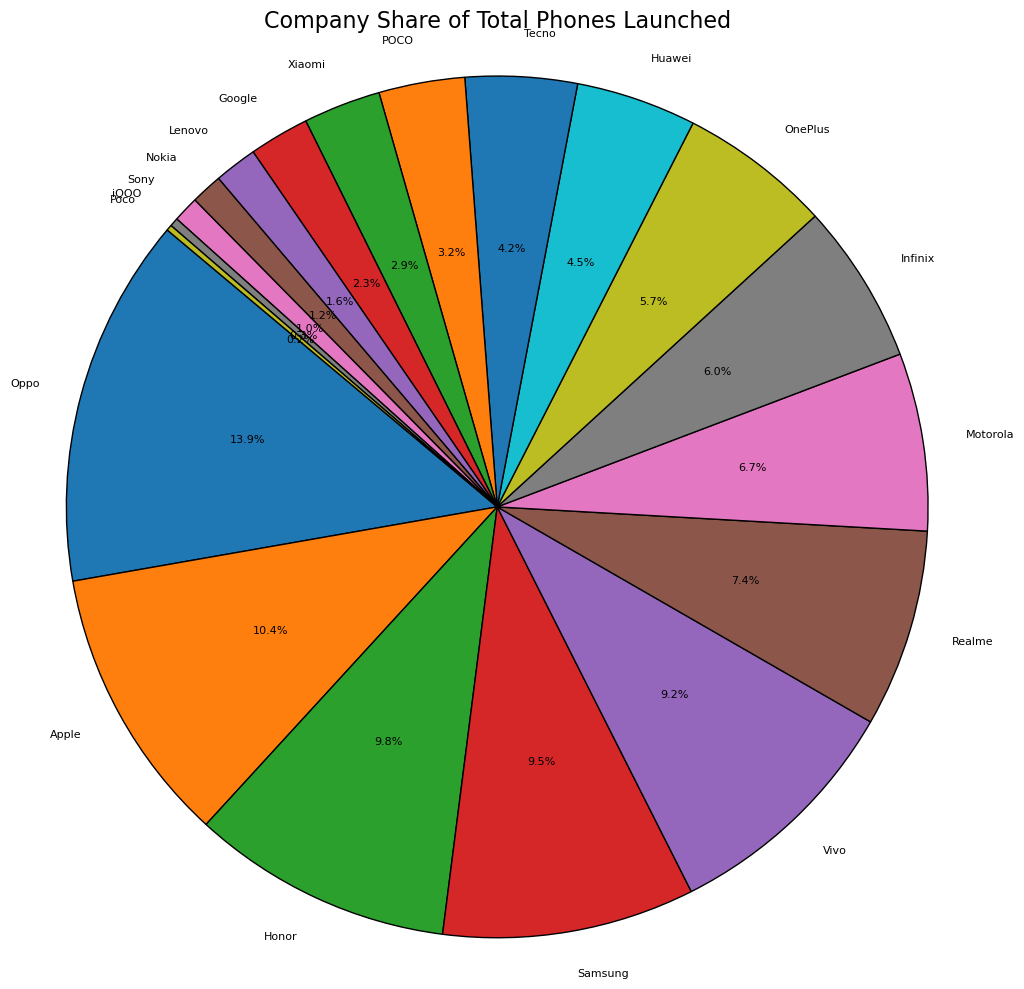

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

company_counts = df['Company Name'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=140,
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
        textprops={'fontsize': 8})
plt.title('Company Share of Total Phones Launched', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

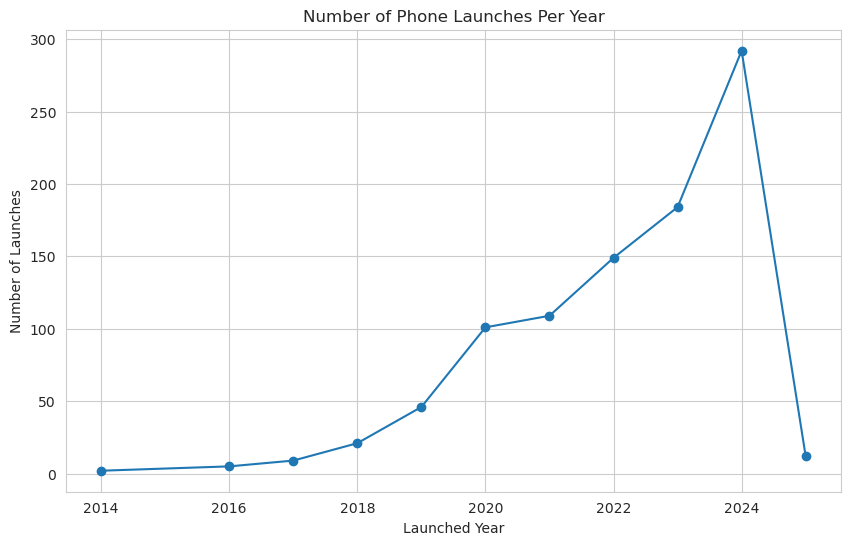

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

launches_per_year = df['Launched Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
launches_per_year.plot(kind='line', marker='o')
plt.title('Number of Phone Launches Per Year')
plt.xlabel('Launched Year')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.show()

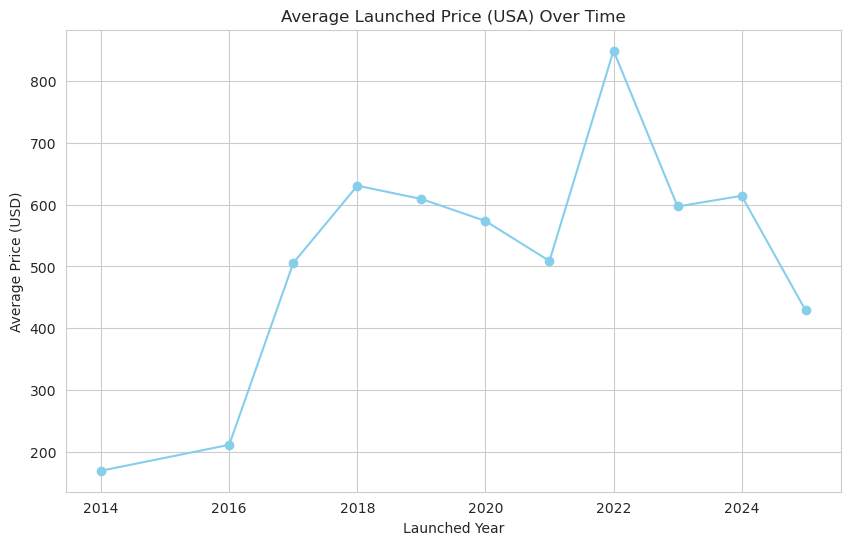

In [40]:
average_price_per_year = df.groupby('Launched Year')['Launched Price (USA)'].mean()

plt.figure(figsize=(10, 6))
average_price_per_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Average Launched Price (USA) Over Time')
plt.xlabel('Launched Year')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.show()

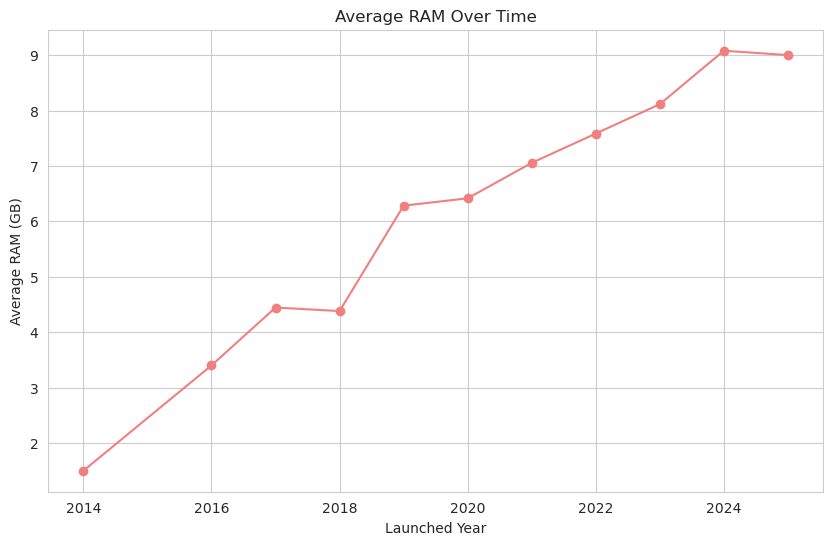

In [41]:
average_ram_per_year = df.groupby('Launched Year')['RAM'].mean()

plt.figure(figsize=(10, 6))
average_ram_per_year.plot(kind='line', marker='o', color='lightcoral')
plt.title('Average RAM Over Time')
plt.xlabel('Launched Year')
plt.ylabel('Average RAM (GB)')
plt.grid(True)
plt.show()

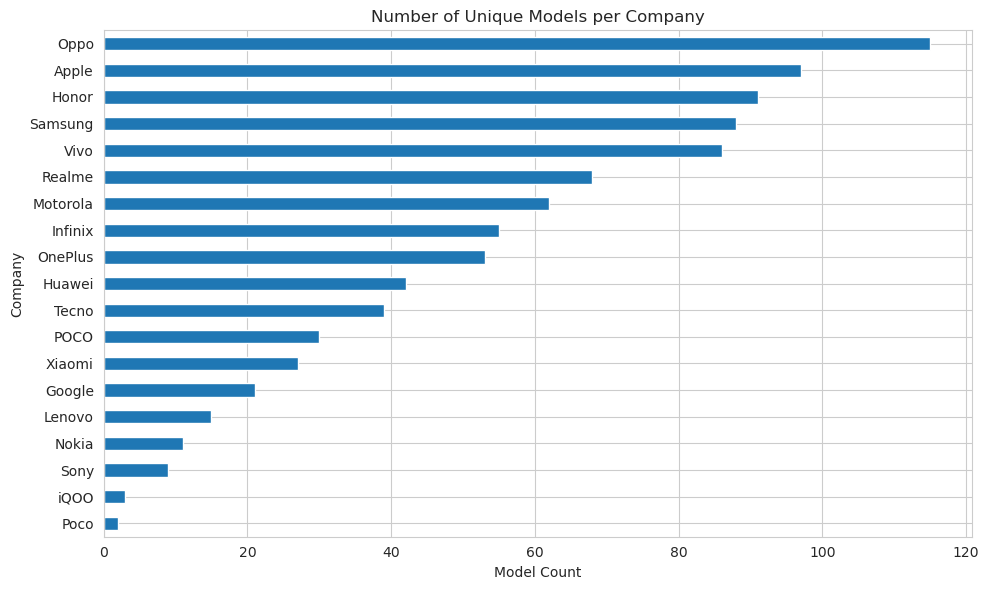

In [42]:
import matplotlib.pyplot as plt

distinct_models.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Number of Unique Models per Company")
plt.xlabel("Model Count")
plt.ylabel("Company")
plt.tight_layout()
plt.show()


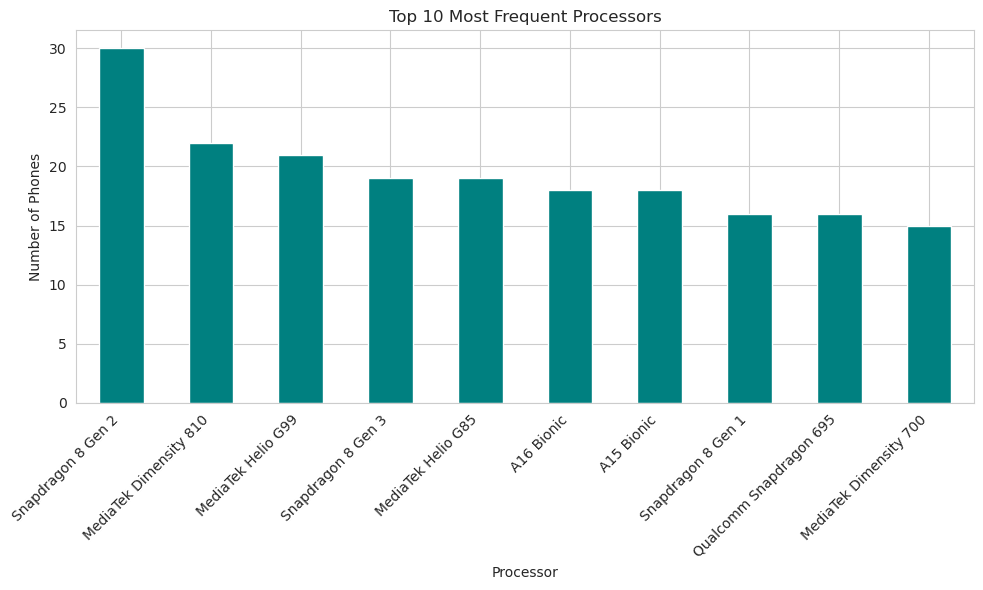

In [44]:
top_processors = df['Processor'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_processors.plot(kind='bar', color='teal')
plt.title('Top 10 Most Frequent Processors')
plt.xlabel('Processor')
plt.ylabel('Number of Phones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

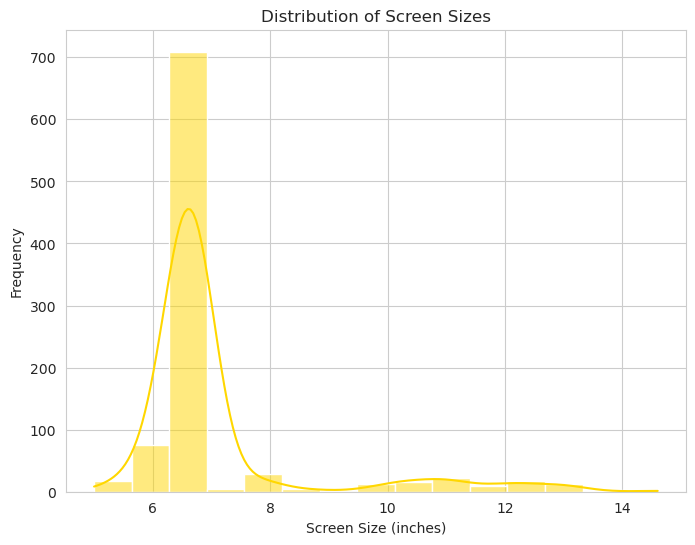

In [45]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Screen Size'].dropna(), bins=15, kde=True, color='gold')
plt.title('Distribution of Screen Sizes')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Frequency')
plt.show()

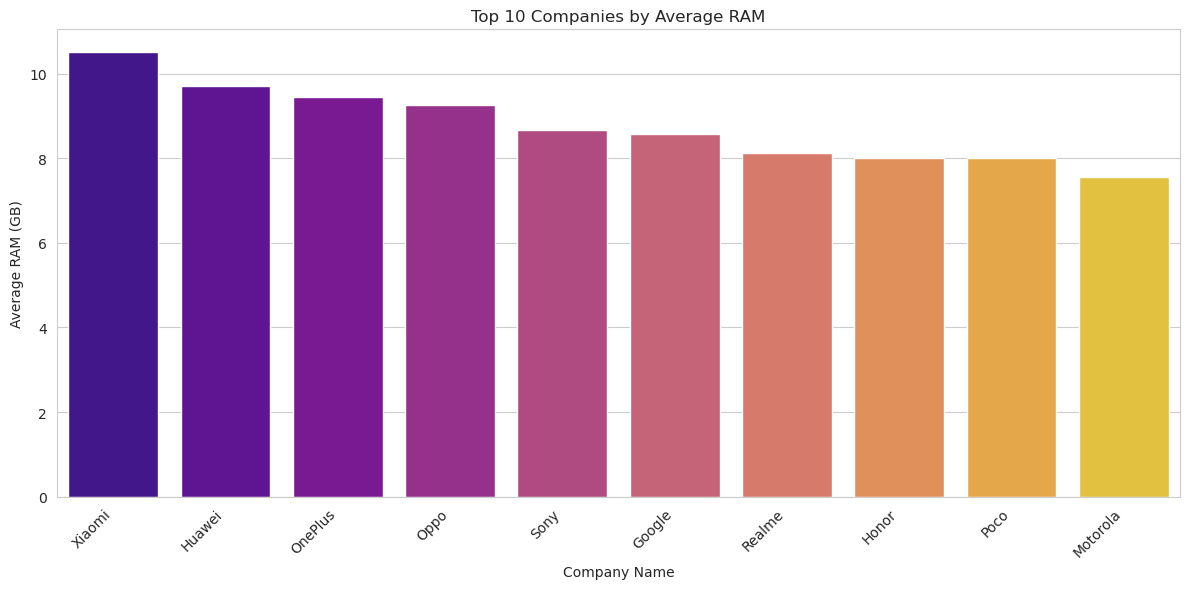

In [47]:
average_ram_by_company = df.groupby('Company Name')['RAM'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=average_ram_by_company.index, y=average_ram_by_company.values, palette='plasma')
plt.title('Top 10 Companies by Average RAM')
plt.xlabel('Company Name')
plt.ylabel('Average RAM (GB)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [48]:
import pandas as pd

# Select numerical columns for correlation analysis
numerical_cols = ['Mobile Weight', 'RAM', 'Front Camera', 'Back Camera', 'Battery Capacity', 'Screen Size', 'Launched Price (USA)', 'Launched Year']

# Create a correlation matrix
correlation_matrix = df[numerical_cols].corr(numeric_only=True)

print("Correlation Matrix of Numerical Features:")
print(correlation_matrix)

Correlation Matrix of Numerical Features:
                      Mobile Weight       RAM  Front Camera  Battery Capacity  \
Mobile Weight              1.000000 -0.007427     -0.285131          0.521955   
RAM                       -0.007427  1.000000      0.473249          0.090385   
Front Camera              -0.285131  0.473249      1.000000         -0.100356   
Battery Capacity           0.521955  0.090385     -0.100356          1.000000   
Screen Size                0.975893  0.046963     -0.231435          0.524046   
Launched Price (USA)       0.104919  0.108546      0.003355          0.128163   
Launched Year              0.066349  0.380281      0.158717          0.310808   

                      Screen Size  Launched Price (USA)  Launched Year  
Mobile Weight            0.975893              0.104919       0.066349  
RAM                      0.046963              0.108546       0.380281  
Front Camera            -0.231435              0.003355       0.158717  
Battery Capacity 


**Big Screens, Heavy Phone** Larger phone screens strongly correlate with heavier phones **Bigger Battery, Heavier Pho:** Phones with larger batteries tend to be heavie* **More RAM Over Te:** Newer phones generally have more R
* **Weak Price Lks:** Price doesn't strongly correlate with individual features like RAM or screen size al
* **Weight & Size vs. Front Camera (Slight Trend):** Heavier and larger phones might slightly lean towards lower megapixel front cameras.ras.